## Matplotlib Project

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('netflix_titles.csv')
print(df.head())

  show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  TV-MA  2 Seasons   
2  September 24, 2021        

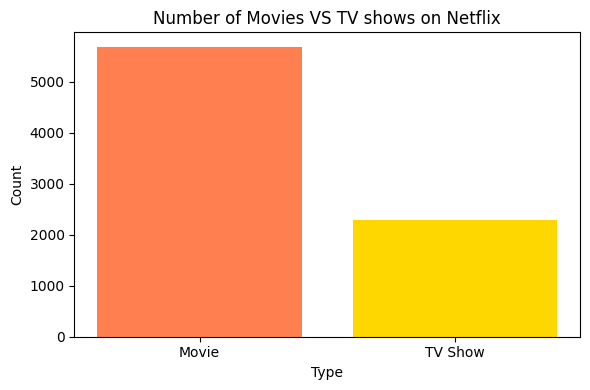

In [11]:
df = df.dropna(subset = ['type', 'release_year', 'rating', 'country', 'duration'])

type_counts = df['type'].value_counts()
plt.figure(figsize=(6, 4))
plt.bar(type_counts.index, type_counts.values, color=['coral', 'gold'])
plt.title("Number of Movies VS TV shows on Netflix")
plt.xlabel("Type")
plt.ylabel("Count")
# plt.legend()
plt.tight_layout()
plt.savefig('movies_vs_tvshows.png')
plt.show()


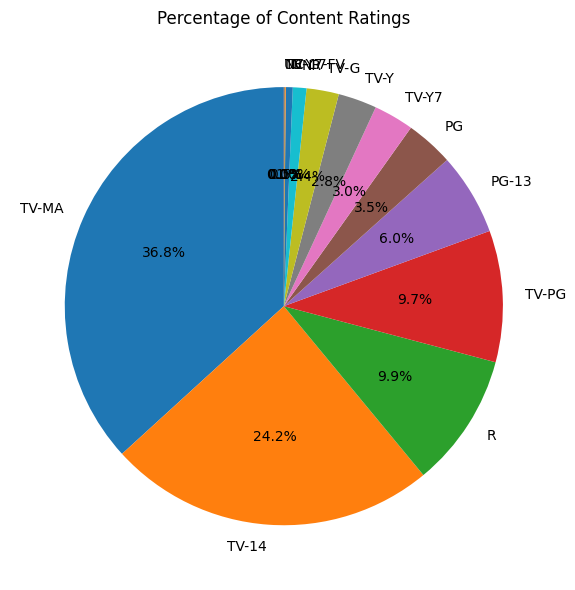

In [12]:
rating_counts = df['rating'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(rating_counts, labels = rating_counts.index, autopct= '%1.1f%%', startangle=90)
plt.title("Percentage of Content Ratings")
# plt.legend()
plt.tight_layout()
plt.savefig('content_ratings_pie.png')
plt.show()



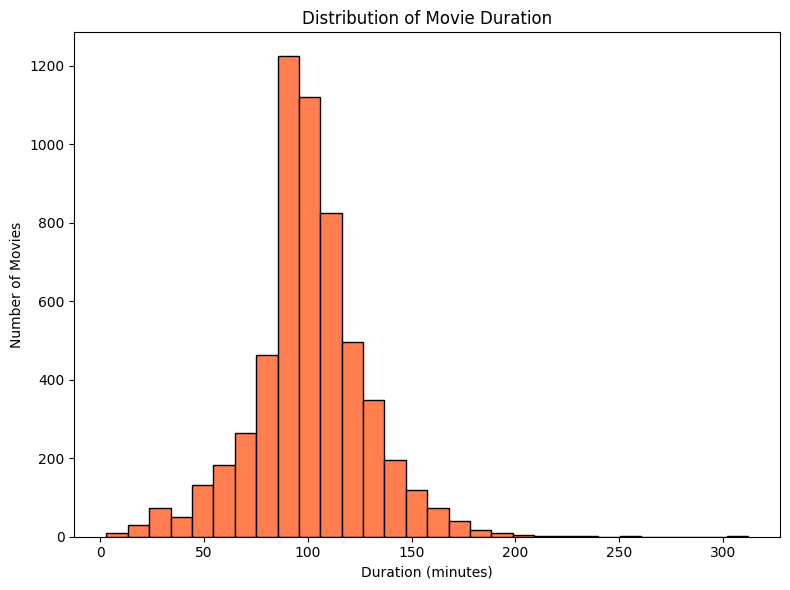

In [14]:
movie_df = df[df['type'] == 'Movie'].copy()
movie_df['duration_int'] = movie_df['duration'].str.replace('min', '').astype(int)

plt.figure(figsize=(8, 6))
plt.hist(movie_df['duration_int'], bins = 30, color = 'coral', edgecolor='black')
plt.title('Distribution of Movie Duration')
plt.xlabel('Duration (minutes)')
plt.ylabel('Number of Movies')
plt.tight_layout()
plt.savefig('movie_duration_histogram.png')
plt.show()

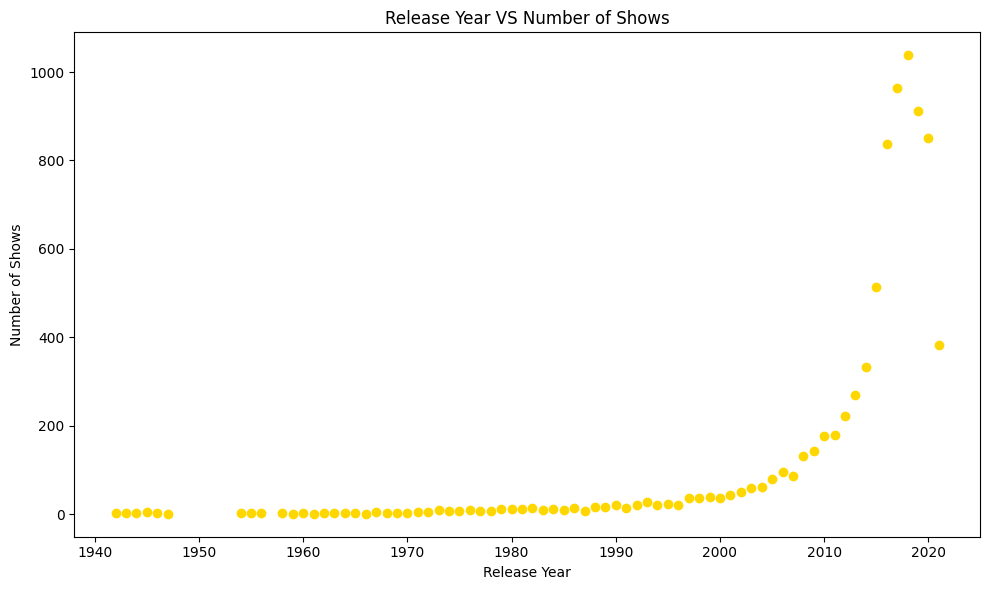

In [15]:
release_counts = df['release_year'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
plt.scatter(release_counts.index, release_counts.values, color='gold')
plt.title('Release Year VS Number of Shows')
plt.xlabel('Release Year')
plt.ylabel('Number of Shows')
plt.tight_layout()
plt.savefig('release_year_Scatter.png')
plt.show()

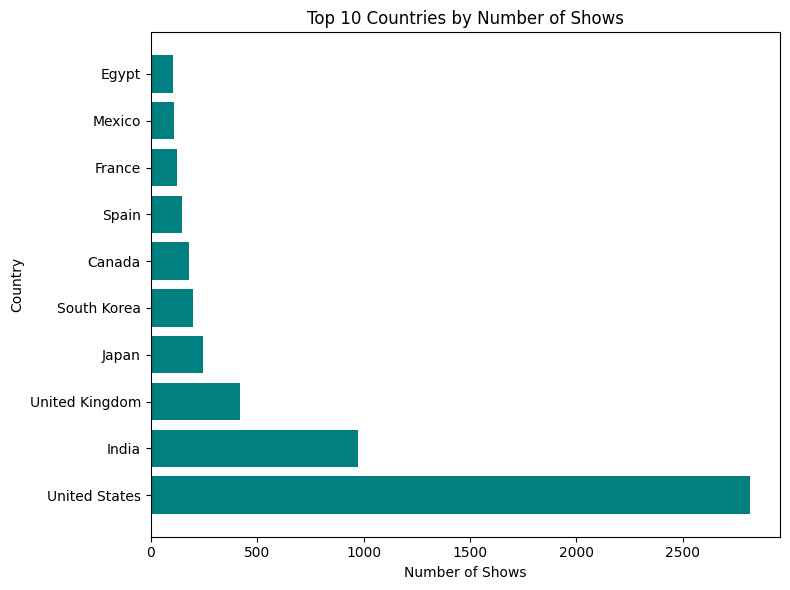

In [16]:
country_counts = df['country'].value_counts().head(10)
plt.figure(figsize=(8, 6))
plt.barh(country_counts.index, country_counts.values, color = 'teal')
plt.title('Top 10 Countries by Number of Shows')
plt.xlabel('Number of Shows')
plt.ylabel('Country')
plt.tight_layout()
plt.savefig('top10_countries.png')
plt.show()

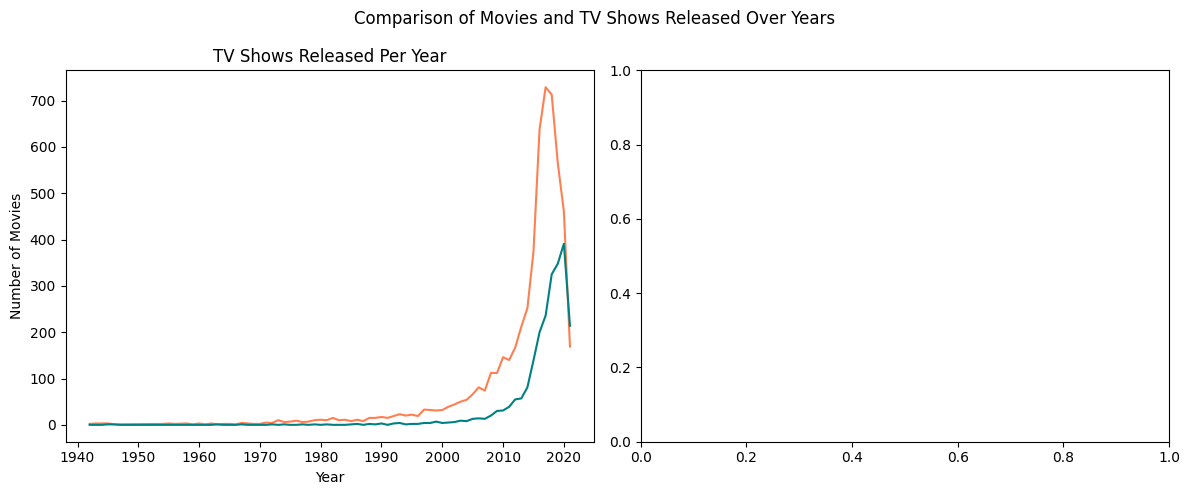

In [20]:
content_by_year = df.groupby(['release_year', 'type']).size().unstack().fillna(0)

fig, ax = plt.subplots(1, 2, figsize=(12, 5))

ax[0].plot(content_by_year.index, content_by_year['Movie'], color='coral')
ax[0].set_title('Movies Released Per Year')
ax[0].set_xlabel('Year')
ax[0].set_ylabel('Number of Movies')

ax[0].plot(content_by_year.index, content_by_year['TV Show'], color = 'teal')
ax[0].set_title('TV Shows Released Per Year')
ax[0].set_xlabel('Year')
ax[0].set_ylabel('Number of Movies')

fig.suptitle('Comparison of Movies and TV Shows Released Over Years')

plt.tight_layout()
plt.savefig('movies_tv_shows_comparison.png')
plt.show()